In [1]:
from IPython.display import Image

# Injury forecasting in soccer

The goal of this project is to predict injuries in professional athletes based on their recent performance data

As a case study, we consider soccer.

Harry Kane, England's and Tottenham Hotspurs's captain

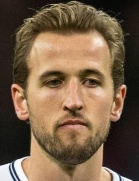

In [2]:
Image(filename='kane.png',width=200, height=300)

April 3, 2019: lackluster performance in home game vs. Crystal Palace

April 9, 2019: ligament injury during match vs. Man City

Kane's season is thought to be over

June 1, 2019: Champions League final Tottenham vs. Liverpool

Kane's recovery is far from complete. He plays the final anyway, but makes no dent on the game.

Liverpool wins 2-0 comfortably

We study data from the top 5 European soccer leagues in the 2017/18 season.

* *Technical data from fbref.com.*

* *Injury data from Transfermarkt.*

In [1]:
labels, sizes=['hamstring Injury',
  'no injuries',
  'multiple injuries',
  'ankle Injury',
  'knee Injury',
  'others'], [21, 145, 33, 10, 12, 49]

In [2]:
import matplotlib
import matplotlib.pyplot as plt

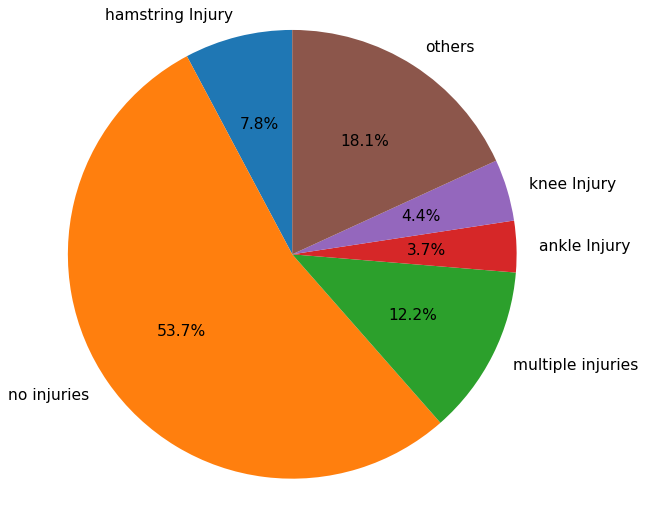

In [7]:
matplotlib.rcParams['figure.dpi'] = 80
fig,ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

fig.savefig('pie_plot.png', bbox_inches="tight")

In [23]:
X.drop(columns=['Unnamed: 0','0'], inplace=True)
X.head()

,Touches_int,Press_int,Tackles,Interceptions,Blocks_int,expected goals,expected non-penalty goals,expected assists,shot-creating actions,goal-creating actions,Attempted Passes,Percentage Completed Passes,Distance Passes,Carries_int,Distance Carries,Successful Dribblings,Attempted Dribblings
0,62.0,7.0,1.0,5.0,8.0,0.0,0.0,0.0,1.0,0.0,49.0,77.6,287.0,27.0,59.0,0.0,0.0
1,71.0,9.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,69.8,488.0,43.0,68.0,0.0,0.0
2,74.0,8.0,3.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,66.0,80.3,376.0,41.0,138.0,4.0,4.0
3,103.0,13.0,0.0,1.0,1.0,0.0,0.0,0.1,1.0,0.0,93.0,74.2,562.0,62.0,61.0,3.0,3.0
4,37.0,19.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,25.0,64.0,196.0,18.0,24.0,2.0,2.0


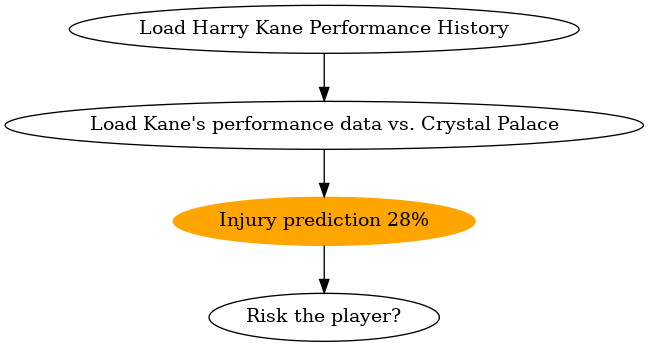

In [3]:
from IPython.display import Image
Image(filename='example.png',width=600, height=800)

* *Unbalanced classification problem*

* *Synthetic data augmentation (SMOTE)*

* *Random Forest Classifier: currently the best performing ML algorithm*

After testing several different machine learning algorithms for a classification problem, we are focusing on the Random Forest Classifier, which seems to give us the best result.

In [21]:
X=pd.read_csv('fbref_0507.csv')

In [22]:
y_label=X['0']

In [23]:
X.drop(columns=['Unnamed: 0','0'], inplace=True)
X.head()

,Touches_int,Press_int,Tackles,Interceptions,Blocks_int,expected goals,expected non-penalty goals,expected assists,shot-creating actions,goal-creating actions,Attempted Passes,Percentage Completed Passes,Distance Passes,Carries_int,Distance Carries,Successful Dribblings,Attempted Dribblings
0,62.0,7.0,1.0,5.0,8.0,0.0,0.0,0.0,1.0,0.0,49.0,77.6,287.0,27.0,59.0,0.0,0.0
1,71.0,9.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,69.8,488.0,43.0,68.0,0.0,0.0
2,74.0,8.0,3.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,66.0,80.3,376.0,41.0,138.0,4.0,4.0
3,103.0,13.0,0.0,1.0,1.0,0.0,0.0,0.1,1.0,0.0,93.0,74.2,562.0,62.0,61.0,3.0,3.0
4,37.0,19.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,25.0,64.0,196.0,18.0,24.0,2.0,2.0


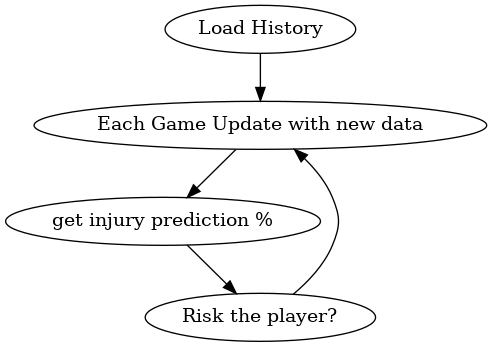

In [9]:
from IPython.display import Image
Image(filename='flowchart2.png',width=500, height=700)

In [24]:
rfc2 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                    param_grid = {'n_estimators' : list(range(10,101,10))}, cv = 5, verbose=True, n_jobs=-1)

best_rfc2 = rfc2.fit(X, y_label)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.5s finished


In [26]:
cf_matrix2 = confusion_matrix(y_label, best_rfc2.predict(X))

pd.DataFrame(cf_matrix2,
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

,class 0 pred,class 1 pred
class 0 actual,8073,0
class 1 actual,33,162


In [27]:
print('Precision = ',cf_matrix2[1,1]/(cf_matrix2[1,1]+cf_matrix2[0,1]))
print('Recall = ',cf_matrix2[1,1]/(cf_matrix2[1,1]+cf_matrix2[1,0]))

Precision =  1.0
Recall =  0.8307692307692308


In [3]:
import pandas as pd

In [10]:
Xandy=pd.read_csv('fbref_cleaneddata.csv')

In [11]:
y=Xandy['0']

In [12]:
Xandy.drop(columns=['Unnamed: 0','0'], inplace=True)
Xandy.head()

,Press_int,Tackles,Interceptions,Blocks_int,Completed Passes,Attempted Passes,Distance Passes,Carries_int,Distance Carries
0,7.0,1.0,5.0,8.0,38.0,49.0,287.0,27.0,59.0
1,9.0,3.0,1.0,1.0,44.0,63.0,488.0,43.0,68.0
2,8.0,3.0,2.0,1.0,53.0,66.0,376.0,41.0,138.0
3,13.0,0.0,1.0,1.0,69.0,93.0,562.0,62.0,61.0
4,19.0,4.0,2.0,2.0,16.0,25.0,196.0,18.0,24.0


In [13]:
len(Xandy)

8347

In [14]:
len(y)

8347

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

In [16]:
rfc = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                    param_grid = {'n_estimators' : list(range(10,101,10))}, cv = 5, verbose=True, n_jobs=-1)

best_rfc = rfc.fit(Xandy, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.7s finished


In [ ]:
cf_matrix = confusion_matrix(y, best_rfc.predict(Xandy))

In [1]:
cf_matrix=[[8119,30],[15,183]]

In [4]:
pd.DataFrame(cf_matrix,
             index = ['No injury', 'Injury'],
             columns = ['Prediction: no injury', 'Prediction: injury'])

,Prediction: no injury,Prediction: injury
No injury,8119,30
Injury,15,183


In [19]:
print('Precision = ',cf_matrix[1,1]/(cf_matrix[1,1]+cf_matrix[0,1]))
print('Recall = ',cf_matrix[1,1]/(cf_matrix[1,1]+cf_matrix[1,0]))

Precision =  0.8591549295774648
Recall =  0.9242424242424242


Interactive dashboard: coming soon!

As a final product, we will create an interactive dashboard where the coaching team can insert the most recent performance data of a player, and extract the probability of an upcoming injury.

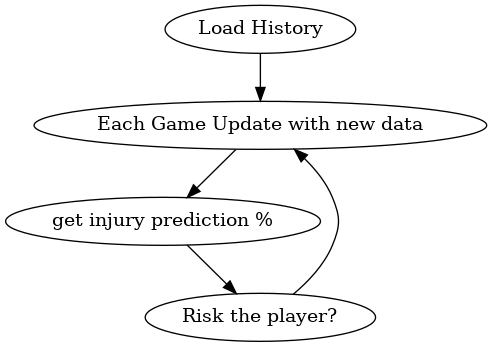

In [10]:
from IPython.display import Image
Image(filename='flowchart2.png',width=500, height=700)

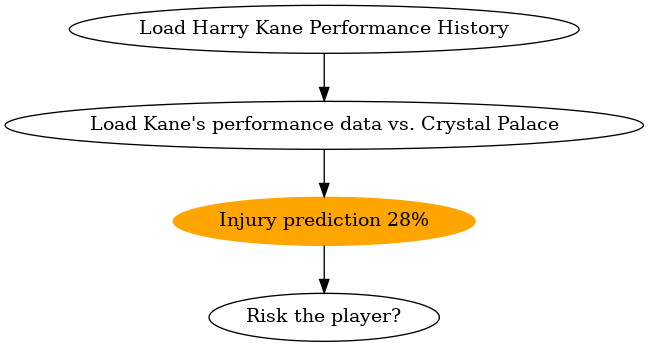

In [3]:
from IPython.display import Image
Image(filename='example.png',width=600, height=800)

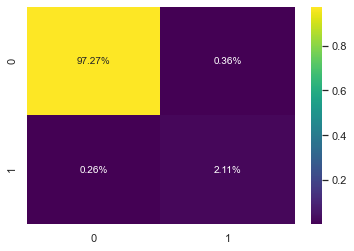

In [12]:
cf_matrix = confusion_matrix(y, best_rfc.predict(Xandy))

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap=plt.cm.viridis)

In [3]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
smox, smoy = smote.fit_sample(Xandy, y)

In [26]:
estimator=RandomForestClassifier(class_weight='balanced', n_estimators=30)

estimator.fit(smox, smoy)
y_pred = estimator.predict(Xandy)
print(classification_report(y, y_pred))
pd.DataFrame(confusion_matrix(y, y_pred),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8149
        True       1.00      0.97      0.99       198

    accuracy                           1.00      8347
   macro avg       1.00      0.99      0.99      8347
weighted avg       1.00      1.00      1.00      8347



,class 0 pred,class 1 pred
class 0 actual,8149,0
class 1 actual,5,193


In [14]:
from collections import Counter
Counter(smoy)

Counter({False: 8149, True: 8149})

In [15]:
len(smox)

16298

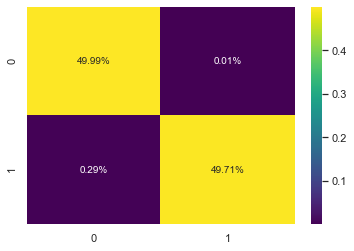

In [20]:
cf_matrix = confusion_matrix(smoy, estimator.predict(smox))

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap=plt.cm.viridis)

In [19]:
import numpy as np

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    smox, smoy, test_size=0.2, random_state=42)

In [23]:
estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
print('in-sample accuracy:', estimator.score(X_train, y_train))
print('out-of-sample accuracy:', estimator.score(X_test, y_test))

in-sample accuracy: 0.9972388403129314
out-of-sample accuracy: 0.9858895705521472


In [27]:
smoy_pred = estimator.predict(X_test)
print(classification_report(y_test, smoy_pred))
pd.DataFrame(confusion_matrix(y_test, smoy_pred),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1631
        True       1.00      1.00      1.00      1629

    accuracy                           1.00      3260
   macro avg       1.00      1.00      1.00      3260
weighted avg       1.00      1.00      1.00      3260



,class 0 pred,class 1 pred
class 0 actual,1631,0
class 1 actual,5,1624


About:

Niccolo' Ronchetti

niccolo.ronchetti@mg.thedataincubator.com

github.com/niccronc/Capstone_Project

In [ ]:
#rise
#Hide input

#about me...

#flowchart